# Criando os nomes

In [15]:
import pandas as pd

In [16]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [17]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [18]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [19]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [20]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
50,RAFAELA,0,272718,51,F
127,TAINA,0,127613,128,F
37,ROSANGELA,0,310226,38,F
149,CICERA,0,108197,150,F
19,MARIANA,0,381778,20,F


In [21]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
187,ELTON,0,71566,188,M
173,JAILSON,0,75076,174,M
134,ALBERTO,0,108018,135,M
147,ALISSON,0,94270,148,M
57,IGOR,0,264732,58,M


In [29]:
print('Quantidade de nomes: ' + str(len(nomes_f)) + str(len(nomes_m)))

Quantidade de nomes: 200200


In [23]:
frames = [nomes_m, nomes_f]

In [24]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
18,VANESSA
55,FLAVIO
145,ITALO
15,LETICIA
176,MARA


In [25]:
len(nomes)

400

# Incluindo ID dos alunos

In [26]:
import numpy as np
np.random.seed(123)

In [27]:
total_alunos = len(nomes)
total_alunos

400

In [33]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [35]:
nomes.sample(5)

,nome,id_aluno
92,VALERIA,23
166,MICHEL,171
98,GILSON,366
142,RAISSA,150
184,ALISON,272


In [37]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [38]:
nomes

,nome,id_aluno,dominio
0,JOSE,47,@servicodoemail.com
1,JOAO,160,@dominioemail.com.br
2,ANTONIO,4,@servicodoemail.com
3,FRANCISCO,98,@servicodoemail.com
4,CARLOS,265,@dominioemail.com.br
...,...,...,...
195,ROSANE,50,@servicodoemail.com
196,IVONETE,274,@servicodoemail.com
197,LUCIANE,269,@servicodoemail.com
198,ISADORA,316,@dominioemail.com.br


In [41]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [42]:
nomes.sample(5)

,nome,id_aluno,dominio,email
75,MARLI,57,@dominioemail.com.br,marli@dominioemail.com.br
18,VANESSA,238,@servicodoemail.com,vanessa@servicodoemail.com
120,EDILSON,138,@servicodoemail.com,edilson@servicodoemail.com
74,LAURA,379,@dominioemail.com.br,laura@dominioemail.com.br
71,BENEDITO,26,@dominioemail.com.br,benedito@dominioemail.com.br


# Criando a tabela Cursos

In [43]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import html5lib

In [46]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [47]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [48]:
type(cursos)

list

In [50]:
cursos = cursos[0]

In [51]:
type(cursos)

pandas.core.frame.DataFrame

In [53]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [55]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [57]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [58]:
cursos['id'] = cursos.index + 1

In [59]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [60]:
cursos = cursos.set_index('id')

In [61]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [62]:
nomes.sample(5)

,nome,id_aluno,dominio,email
15,BRUNO,83,@servicodoemail.com,bruno@servicodoemail.com
167,TAINARA,364,@dominioemail.com.br,tainara@dominioemail.com.br
165,EUNICE,108,@dominioemail.com.br,eunice@dominioemail.com.br
168,CRISTIAN,251,@dominioemail.com.br,cristian@dominioemail.com.br
180,EDER,62,@servicodoemail.com,eder@servicodoemail.com


In [76]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [77]:
nomes.sample(3)

,nome,id_aluno,dominio,email,Matriculas,matriculas
159,ARNALDO,260,@dominioemail.com.br,arnaldo@dominioemail.com.br,1,2
73,JANAINA,7,@dominioemail.com.br,janaina@dominioemail.com.br,2,8
27,LUANA,289,@dominioemail.com.br,luana@dominioemail.com.br,1,1


In [78]:
nomes.matriculas.describe()

count    400.000000
mean       2.037500
std        1.430458
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max        8.000000
Name: matriculas, dtype: float64

In [79]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


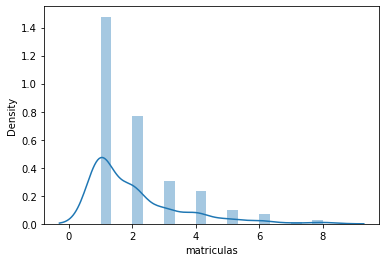

In [80]:
sns.distplot(nomes.matriculas)

In [82]:
nomes.matriculas.value_counts()

1    197
2    103
3     41
4     31
5     13
6      9
8      4
7      2
Name: matriculas, dtype: int64